# ML Term Paper - Code: Describe Data
by Ann-Christin and Sarah 18/02/21

This notebook uses the piaac_red file to describe the data used in the analysis. 

In [3]:
# Packages to import 

import re

import random
#from PIL import Image
import seaborn as sns
import sklearn.decomposition
import sklearn.manifold
import umap #if missing: pip install umap
import scipy.stats



import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import tree as tree
from pandas import Series, DataFrame
print("done")

done


In [4]:
import os
path = "E:\Data\krea\PIAAC"
os.chdir(path)
print("done")

done


In [178]:
data = pd.read_csv("data\piaac_red.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
data.shape

(230691, 132)

In [7]:
data.describe()

,Unnamed: 0,cntry,cntry_e,inpiaac,seqid,cnt_brth,ageg10lfs,age_r,gender_r,j_q03b,...,nfe12jr,nfe12njr,fnfaet12,fnfaet12jr,fnfaet12njr,nfehrsnjr,nfehrsjr,nfehrs,nopaidworkever,unempflag
count,230691,3660,3660,3660,230691,160270,227031,166949,230689,103091,...,216972,216972,200153,198853,198853,54687,54687,80121,228135,3477
unique,230691,1,1,2,26967,182,5,50,2,24,...,2,2,2,2,2,539,568,474,2,2
top,197393,USA,USA,1.0,2390.0,Poland,35-44,21.0,Female,2.0,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,0.0,0.0,40.0,Has had paid work,0.0
freq,1,3660,3660,3296,35,9612,46872,3872,122830,44747,...,140246,200186,106426,122590,182689,32659,6681,6877,204720,3339


## Changing Data Types

In [183]:
data['gender_r'] = data['gender_r'].astype('category')
data["age_r"] = pd.to_numeric(data["age_r"])
data['b_q12a'] = data['b_q12a'].astype('category') # yes/no open educational training
data['b_q12b'] = pd.to_numeric(data["b_q12b"]) # number of open/distance educational trainings
data["b_q12d"] = pd.to_numeric(data["b_q12d"]) # count on-the-job training
data['b_q12e'] = data['b_q12e'].astype('category')  # yes/no seminars training
data['b_q12f'] = pd.to_numeric(data["b_q12f"]) # number of seminars
data['b_q12g'] = data['b_q12g'].astype('category')  # yes/no private training
data['b_q12h'] = pd.to_numeric(data["b_q12h"]) # number of private educational trainings
data['j_q03a'] = data['j_q03a'].astype('category') # yes/no children
data['j_q03b'] = pd.to_numeric(data['j_q03b']) # number of children
data['yrsqual_t'] = pd.to_numeric(data['yrsqual_t'])
data['yrsget'] = pd.to_numeric(data['yrsget'])
data['iscoskil4'] = data['iscoskil4'].astype('category')
data['h_q05g'] = data['h_q05g'].astype('category') # Skill use everyday life - ICT - Computer - How often - Programming language  
data['g_q05g'] = data['g_q05g'].astype('category') # skill use work - ICT programming lanugage how often
#data['g_q05'] = data['g_q05'].astype('category') # use computer at work yes/no

## Summary Statistics

In [44]:
data['gender_r'].describe

<bound method NDFrame.describe of 0           Male
1           Male
2         Female
3         Female
4           Male
           ...  
230686      Male
230687      Male
230688    Female
230689      Male
230690      Male
Name: gender_r, Length: 230691, dtype: category
Categories (2, object): ['Female', 'Male']>

In [28]:
data['gender_r'].value_counts()

Female    122830
Male      107859
Name: gender_r, dtype: int64

In [84]:
#data['age_r'] = data['age_r'].fillna(0)
#data['age_r'].describe

In [163]:

data['age_r'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: age_r, Length: 230691, dtype: float64>

In [58]:
data['age_r'].value_counts()

21.0    3872
23.0    3862
19.0    3823
20.0    3802
22.0    3721
26.0    3683
24.0    3671
40.0    3632
25.0    3589
39.0    3517
37.0    3502
41.0    3462
38.0    3461
36.0    3458
33.0    3425
31.0    3424
34.0    3417
35.0    3415
30.0    3414
32.0    3385
47.0    3370
45.0    3365
42.0    3360
17.0    3353
18.0    3353
48.0    3350
29.0    3340
46.0    3321
43.0    3321
44.0    3289
49.0    3266
52.0    3236
28.0    3201
55.0    3192
27.0    3184
53.0    3173
50.0    3172
64.0    3158
51.0    3147
56.0    3125
16.0    3123
57.0    3092
58.0    3074
54.0    3070
59.0    3018
60.0    3003
62.0    2998
61.0    2992
63.0    2982
65.0    2786
Name: age_r, dtype: int64

In [51]:
#data['age_r'] = data['age_r'].astype('integer')

In [59]:
data['age_r'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: age_r, Length: 230691, dtype: float64>

In [77]:
data[["age_r"]].mean()

age_r    39.687485
dtype: float64

In [95]:
data[["gender_r", "age_r"]].groupby("gender_r").mean()

,age_r
gender_r,
Female,39.957589
Male,39.378828


In [164]:

data['b_q12d'].describe


<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12d, Length: 230691, dtype: float64>

In [110]:
#data.groupby('b_q12d').describe()
data.groupby('b_q12d').describe().unstack(1)

              b_q12d
age_r  count  0.0          31.0
              1.0       14106.0
              2.0        9846.0
              3.0        5918.0
              4.0        3196.0
                         ...   
       max    46.0         38.0
              47.0          NaN
              48.0         61.0
              49.0         32.0
              50.0         64.0
Length: 360, dtype: float64

In [165]:

data['b_q12b'].describe # number of open/distance educational trainings

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12b, Length: 230691, dtype: float64>

In [166]:

data['b_q12a'].describe# yes/no open educational training

<bound method NDFrame.describe of 0          No
1         Yes
2          No
3          No
4         Yes
         ... 
230686     No
230687     No
230688     No
230689     No
230690     No
Name: b_q12a, Length: 230691, dtype: category
Categories (2, object): ['No', 'Yes']>

In [104]:

data['b_q12e'].describe # yes/no semianrs / workshops

<bound method NDFrame.describe of 0          No
1         Yes
2          No
3          No
4          No
         ... 
230686    Yes
230687     No
230688     No
230689     No
230690     No
Name: b_q12e, Length: 230691, dtype: category
Categories (2, object): ['No', 'Yes']>

In [170]:

data['b_q12f'].describe # number of seminars 

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12f, Length: 230691, dtype: float64>

In [171]:

data['b_q12g'].describe # yes/no private training

<bound method NDFrame.describe of 0         No
1         No
2         No
3         No
4         No
          ..
230686    No
230687    No
230688    No
230689    No
230690    No
Name: b_q12g, Length: 230691, dtype: category
Categories (2, object): ['No', 'Yes']>

In [172]:

data['b_q12h'].describe # number of private educational trainings

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12h, Length: 230691, dtype: float64>

In [173]:

data['iscoskil4'].describe

<bound method NDFrame.describe of 0         A
1         1
2         4
3         2
4         1
         ..
230686    2
230687    3
230688    2
230689    3
230690    1
Name: iscoskil4, Length: 230691, dtype: category
Categories (7, object): ['1', '2', '3', '4', 'A', 'N', 'U']>

In [175]:

data['j_q03b'].describe # number of children

<bound method NDFrame.describe of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
230686    NaN
230687    NaN
230688    NaN
230689    NaN
230690    NaN
Name: j_q03b, Length: 230691, dtype: object>

In [112]:

data['yrsqual_t'].describe

<bound method NDFrame.describe of 0          NaN
1         19.0
2          NaN
3          NaN
4          NaN
          ... 
230686     NaN
230687     NaN
230688     NaN
230689     NaN
230690     NaN
Name: yrsqual_t, Length: 230691, dtype: category
Categories (21, object): ['10.0', '11.0', '12.0', '13.0', ..., '6.0', '7.0', '8.0', '9.0']>

In [114]:
data['yrsget'].describe

<bound method NDFrame.describe of 0          NaN
1         19.0
2          NaN
3          NaN
4          NaN
          ... 
230686     8.0
230687    11.0
230688    11.0
230689    12.0
230690     NaN
Name: yrsget, Length: 230691, dtype: category
Categories (22, object): ['0.0', '10.0', '11.0', '12.0', ..., '6.0', '7.0', '8.0', '9.0']>

In [115]:

data['h_q05g'].describe

<bound method NDFrame.describe of 0         Never
1         Never
2         Never
3         Never
4         Never
          ...  
230686    Never
230687      NaN
230688    Never
230689    Never
230690      NaN
Name: h_q05g, Length: 230691, dtype: category
Categories (5, object): ['At least once a week but not every day', 'Every day', 'Less than once a month', 'Less than once a week but at least once a month', 'Never']>

In [122]:
#col_names = ['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']

for ii in ['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']:
    print(data[[ii]].mean)
   
    
    
    
    #for ii, band in enumerate(bands):
    #    sns.histplot(dataframe[band].values.reshape(-1,), ax=ax[ii], kde=True, bins=25) # Reshape into 1D array
     #   ax[ii].set_title('{} band'.format(band_names[ii])) # Subplot titles

#data[['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']].describe()

<bound method NDFrame._add_numeric_operations.<locals>.mean of         age_r
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
...       ...
230686    NaN
230687    NaN
230688    NaN
230689    NaN
230690    NaN

[230691 rows x 1 columns]>
<bound method NDFrame._add_numeric_operations.<locals>.mean of        gender_r
0          Male
1          Male
2        Female
3        Female
4          Male
...         ...
230686     Male
230687     Male
230688   Female
230689     Male
230690     Male

[230691 rows x 1 columns]>
<bound method NDFrame._add_numeric_operations.<locals>.mean of         b_q12d
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
230686     NaN
230687     NaN
230688     NaN
230689     NaN
230690     NaN

[230691 rows x 1 columns]>
<bound method NDFrame._add_numeric_operations.<locals>.mean of        b_q12a
0          No
1         Yes
2          No
3          No
4         Yes
...       ...
230686     No
230687     N

## Histograms

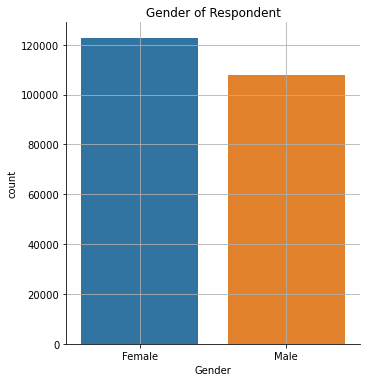

In [27]:
sns_plot = sns.catplot(x="gender_r", kind="count", data=data)
plt.title('Gender of Respondent')
plt.grid(axis='both')
plt.xlabel('Gender')
sns_plot.savefig("plots/barplot_gender.png")


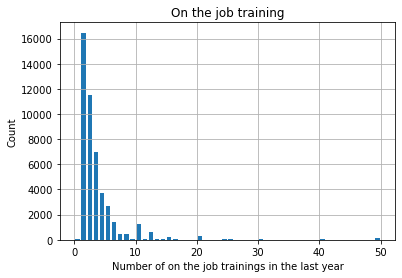

In [134]:
plt.hist(x='b_q12d', bins=50, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
plt.title('On the job training')
plt.grid(axis='both')
plt.xlabel('Number of on the job trainings in the last year')
plt.ylabel('Count')
plt.savefig('plots\hist_count_onthejob.png', bbox_inches='tight')


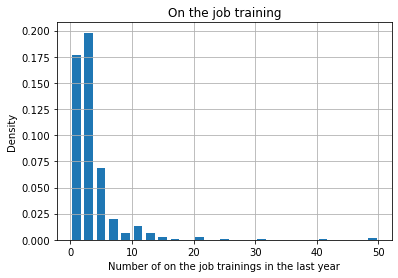

In [135]:
plt.hist(x='b_q12d', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
plt.title('On the job training')
plt.grid(axis='both')
plt.xlabel('Number of on the job trainings in the last year')
plt.ylabel('Density')
plt.savefig('plots\hist_density_onthejob.png', bbox_inches='tight')


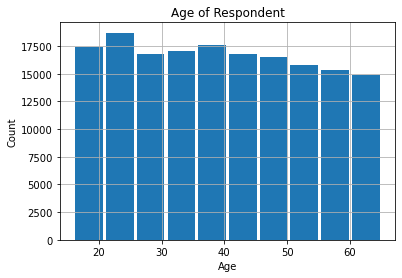

In [75]:
plt.hist(x='age_r', bins=10, range=None, density=False,  histtype='bar',rwidth=0.9, data=data)
plt.title('Age of Respondent')
plt.grid(axis='both')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('plots\hist_age.png', bbox_inches='tight')

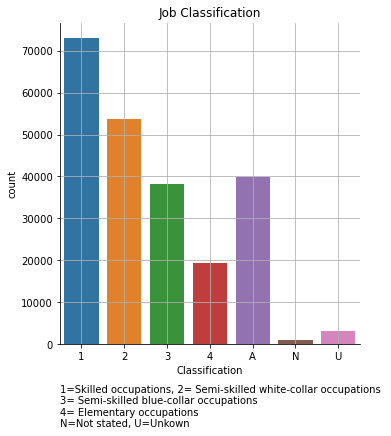

In [141]:
sns_plot = sns.catplot(x="iscoskil4", kind="count", data=data)
plt.title('Job Classification')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.annotate('1=Skilled occupations, 2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

sns_plot.savefig("plots/barplot_job_classification.png")


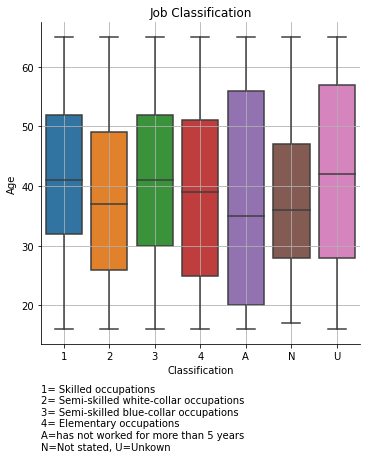

In [185]:
sns_plot = sns.catplot(x="iscoskil4", y="age_r",kind="box", data=data)
plt.title('Job Classification')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nA=has not worked for more than 5 years \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

sns_plot.savefig("plots/box_age_job_classification.png")


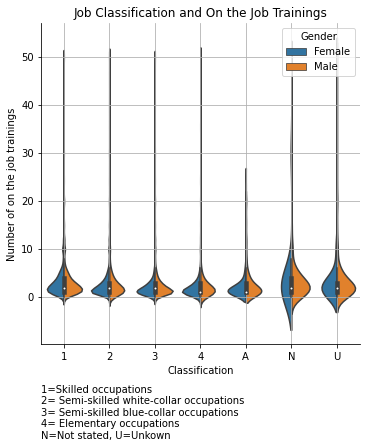

In [155]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12d",kind="violin", hue="gender_r", split=True,data=data, legend=False)
plt.title('Job Classification and On the Job Trainings')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Number of on the job trainings')
plt.annotate('1=Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("plots/violin_gender_OntheJob_classification.png")


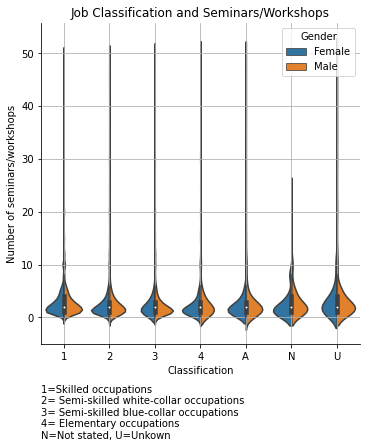

In [182]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12f",kind="violin", hue="gender_r", split=True,data=data, legend=False)
plt.title('Job Classification and Seminars/Workshops')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Number of seminars/workshops')
plt.annotate('1=Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("plots/violin_gender_seminars_classification.png")


In [ ]:
b_q12d

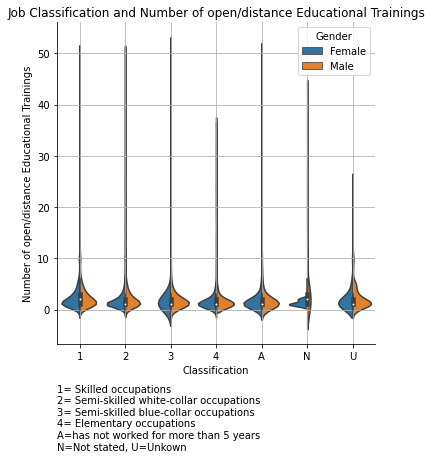

In [191]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12b",kind="violin",hue="gender_r", split=True, data=data,  legend=False)
plt.title('Job Classification and Number of open/distance Educational Trainings')
plt.grid(axis='both')
plt.ylabel('Number of open/distance Educational Trainings')
plt.xlabel('Classification')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nA=has not worked for more than 5 years \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("plots/violin_gender_open_classification.png")
